In [1]:
# install and import the required libraries

!pip install pandas spacy
import pandas as pd
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
import string

In [2]:
# download a pre-trained English language model

!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 22.5 MB/s eta 0:00:0000:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [3]:
#Load the language model

nlp = spacy.load("en_core_web_sm")

#and read in the csv file using pandas

document = pd.read_csv("/Users/sascha.schmid/Documents/University/Master/04 NLP/Project/20230427_Data & Results.xlsx - Data & Labels.csv")

In [4]:
# Define a function to tokenize each sentence, remove stop words 
# and punctuation, 
# and save the resulting tokens with their corresponding date

def tokenize_sentences(document):
    word_counts = []
    for _, row in document.iterrows():
        date = row['date']
        sentence = row['text']
        doc = nlp(sentence)
        for token in doc:
            if not token.is_stop and not token.is_punct:
                word_counts.append((date, token.lemma_))
    return pd.DataFrame(word_counts, columns=['date', 'word'])

In [5]:
# Apply the function to the document to tokenize the sentences

word_counts = tokenize_sentences(document)

In [6]:
# Count the occurrences of each word for each date
counts_by_date = word_counts.groupby(['date', 'word']).size().reset_index(name='count')

# Print the word counts by date
print(counts_by_date)

           date        word  count
0      01.07.20         0.1      1
1      01.07.20         1.2      1
2      01.07.20         1.9      1
3      01.07.20          12      2
4      01.07.20        2020      1
...         ...         ...    ...
27982  31.08.10        wage      1
27983  31.08.10      wealth      1
27984  31.08.10       widen      1
27985  31.08.10  widespread      1
27986  31.08.10        year      5

[27987 rows x 3 columns]


In [7]:
# writing  the dataframe to another csv file

counts_by_date.to_csv('/Users/sascha.schmid/Documents/University/Master/04 NLP/Jupyter Notebooks/Output/counts_by_date_Output.csv', 
                 index = False)

### Generate chart for "MBS" mentions

/var/folders/t5/mfmmp3511vlc5yzl_kvwpg2h0000gn/T/ipykernel_95927/4066591077.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mbs_counts['date'] = pd.to_datetime(mbs_counts['date'])
/var/folders/t5/mfmmp3511vlc5yzl_kvwpg2h0000gn/T/ipykernel_95927/4066591077.py:17: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mbs_counts = mbs_counts.resample('D').sum()


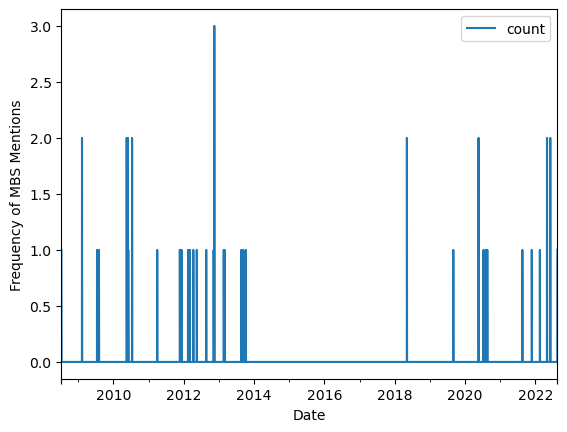

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the word counts DataFrame from the previous step
counts_by_date = pd.read_csv('/Users/sascha.schmid/Documents/University/Master/04 NLP/Jupyter Notebooks/Output/counts_by_date_Output.csv')

# Filter the DataFrame to only include rows with the word "MBS"
mbs_counts = counts_by_date[counts_by_date['word'] == 'MBS']

# Convert the date column to a datetime type
mbs_counts['date'] = pd.to_datetime(mbs_counts['date'])

# Set the date column as the DataFrame index
mbs_counts.set_index('date', inplace=True)

# Resample the DataFrame to aggregate the counts by day
mbs_counts = mbs_counts.resample('D').sum()

# Create a line chart
mbs_counts.plot(kind='line', y='count', xlabel='Date', ylabel='Frequency of MBS Mentions')

# Show the chart
plt.show()

### Generate chart for "Greece" mentions

/var/folders/t5/mfmmp3511vlc5yzl_kvwpg2h0000gn/T/ipykernel_95927/1255154742.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  greece_counts['date'] = pd.to_datetime(greece_counts['date'])
/var/folders/t5/mfmmp3511vlc5yzl_kvwpg2h0000gn/T/ipykernel_95927/1255154742.py:17: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  greece_counts = greece_counts.resample('D').sum()


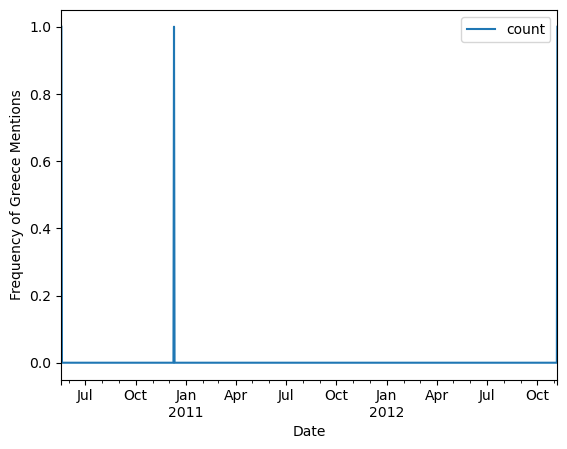

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the word counts DataFrame from the previous step
counts_by_date = pd.read_csv('/Users/sascha.schmid/Documents/University/Master/04 NLP/Jupyter Notebooks/Output/counts_by_date_Output.csv')

# Filter the DataFrame to only include rows with the word "Greece"
greece_counts = counts_by_date[counts_by_date['word'] == 'Greece']

# Convert the date column to a datetime type
greece_counts['date'] = pd.to_datetime(greece_counts['date'])

# Set the date column as the DataFrame index
greece_counts.set_index('date', inplace=True)

# Resample the DataFrame to aggregate the counts by day
greece_counts = greece_counts.resample('D').sum()

# Create a line chart
greece_counts.plot(kind='line', y='count', xlabel='Date', ylabel='Frequency of Greece Mentions')

# Show the chart
plt.show()

### Generate chart for "inflation" mentions

/var/folders/t5/mfmmp3511vlc5yzl_kvwpg2h0000gn/T/ipykernel_95927/3809316064.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inflation_counts['date'] = pd.to_datetime(inflation_counts['date'])
/var/folders/t5/mfmmp3511vlc5yzl_kvwpg2h0000gn/T/ipykernel_95927/3809316064.py:17: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  inflation_counts = inflation_counts.resample('D').sum()


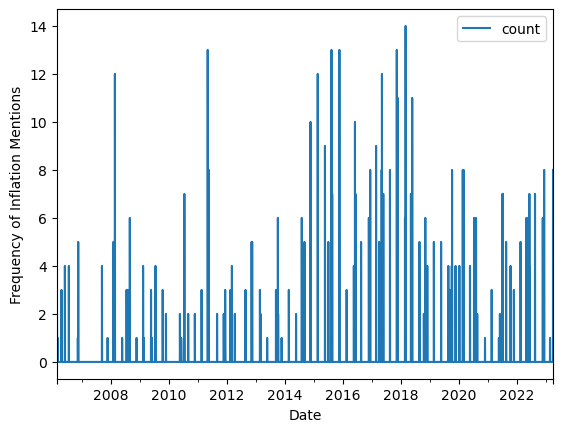

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the word counts DataFrame from the previous step
counts_by_date = pd.read_csv('/Users/sascha.schmid/Documents/University/Master/04 NLP/Jupyter Notebooks/Output/counts_by_date_Output.csv')

# Filter the DataFrame to only include rows with the word "inflation"
inflation_counts = counts_by_date[counts_by_date['word'] == 'inflation']

# Convert the date column to a datetime type
inflation_counts['date'] = pd.to_datetime(inflation_counts['date'])

# Set the date column as the DataFrame index
inflation_counts.set_index('date', inplace=True)

# Resample the DataFrame to aggregate the counts by day
inflation_counts = inflation_counts.resample('D').sum()

# Create a line chart
inflation_counts.plot(kind='line', y='count', xlabel='Date', ylabel='Frequency of Inflation Mentions')

# Show the chart
plt.show()